# Introduction
The data set I chose for this study is the dataset for bylaw infrations in the city of Edmonton in Alberta, Canada.

My goal from this study is to find any insights I can from this data with regards to:
    
    - what are the most common infractions committed and what are their frequencies?
    - the rate of which bylaw infractions increase or decrease with time?
    - do certain areas experience more infractions consistently or not?
    - obtain a visual representation of infractions locations over time
    - are more infractions reported by citizens or officers? and does it differ by location?

Most of the column names explain what the data refers to, I found the only confusing column title to be "Count".

Upon some investigation I found that this number refers to the number of complaints received pertaining to the same infraction.

In [1]:
# import all the necessary libraries and tools we will use for this study

In [203]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sen

In [3]:
# import the data from a local file
# the original source for the data is https://data.edmonton.ca/Community-Services/Bylaw-Infractions/xgwu-c37w#

In [4]:
df = pd.read_csv('Bylaw_Infractions.csv')

# draw basic insights from the initial state of our dataset

- look at a sample from the top and bottom portion of our data

In [5]:
df.head(10)

,YEAR,MONTH_NUMBER,MONTH,REPORT_PERIOD,NEIGHBOURHOOD,NEIGHBOURHOOD_ID,COMPLAINT,INITIATED_BY,STATUS,COUNT,LATITUDE,LONGITUDE,LOCATION
0,2019,10,OCTOBER,OCTOBER-2019,Albany,3460,Unlicensed Business,Citizen,Under Investigation,1,53.63238,-113.549420,"(53.63237907826318, -113.54942007346139)"
1,2019,10,OCTOBER,OCTOBER-2019,Alberta Avenue,1010,Nuisance Property,Citizen,Resolved Complaint,1,53.56848,-113.485168,"(53.568479070121306, -113.48516811504425)"
2,2019,10,OCTOBER,OCTOBER-2019,Alberta Avenue,1010,Nuisance Property,Citizen,Under Investigation,4,53.56848,-113.485168,"(53.568479070121306, -113.48516811504425)"
3,2019,10,OCTOBER,OCTOBER-2019,Alberta Avenue,1010,Nuisance Property,By-law Officer,Under Investigation,6,53.56848,-113.485168,"(53.568479070121306, -113.48516811504425)"
4,2019,10,OCTOBER,OCTOBER-2019,Alberta Avenue,1010,Unlicensed Business,Citizen,Under Investigation,2,53.56848,-113.485168,"(53.568479070121306, -113.48516811504425)"
5,2019,10,OCTOBER,OCTOBER-2019,Aldergrove,4020,Nuisance Property,By-law Officer,Under Investigation,2,53.51689,-113.641239,"(53.51688913781737, -113.64123923064204)"
6,2019,10,OCTOBER,OCTOBER-2019,Aldergrove,4020,Unlicensed Business,By-law Officer,Resolved Complaint,1,53.51689,-113.641239,"(53.51688913781737, -113.64123923064204)"
7,2019,10,OCTOBER,OCTOBER-2019,Aldergrove,4020,Unlicensed Business,Citizen,Under Investigation,1,53.51689,-113.641239,"(53.51688913781737, -113.64123923064204)"
8,2019,10,OCTOBER,OCTOBER-2019,Allard,5458,Nuisance Property,Citizen,Resolved Complaint,1,53.40116,-113.526641,"(53.401164404868766, -113.52664102925431)"
9,2019,10,OCTOBER,OCTOBER-2019,Allard,5458,Unlicensed Business,Citizen,Under Investigation,1,53.40116,-113.526641,"(53.401164404868766, -113.52664102925431)"


In [6]:
df.tail(10)

,YEAR,MONTH_NUMBER,MONTH,REPORT_PERIOD,NEIGHBOURHOOD,NEIGHBOURHOOD_ID,COMPLAINT,INITIATED_BY,STATUS,COUNT,LATITUDE,LONGITUDE,LOCATION
82383,2011,1,JANUARY,JANUARY-2011,Westwood,1250,Unlicensed Business,Citizen,Resolved Complaint,1,53.57593,-113.498566,"(53.57592737297088, -113.49856633573037)"
82384,2011,1,JANUARY,JANUARY-2011,Wild Rose,6790,Snow/Ice On Walk,Citizen,Resolved Complaint,6,53.47058,-113.381167,"(53.47058430162453, -113.381166576475)"
82385,2011,1,JANUARY,JANUARY-2011,Wild Rose,6790,Snow/Ice On Walk,By-law Officer,Resolved Complaint,12,53.47058,-113.381167,"(53.47058430162453, -113.381166576475)"
82386,2011,1,JANUARY,JANUARY-2011,Windermere,5570,Snow/Ice On Walk,Citizen,Resolved Complaint,4,53.43259,-113.626040,"(53.432585054620894, -113.6260401497922)"
82387,2011,1,JANUARY,JANUARY-2011,Windsor Park,5580,Snow/Ice On Walk,Citizen,Resolved Complaint,4,53.52418,-113.536847,"(53.52417761053836, -113.53684717900765)"
82388,2011,1,JANUARY,JANUARY-2011,Winterburn Industrial Area West,4670,Unlicensed Business,Citizen,Resolved Complaint,1,53.56280,-113.701390,"(53.56280461163557, -113.70139042923718)"
82389,2011,1,JANUARY,JANUARY-2011,Woodcroft,3450,Snow/Ice On Walk,Citizen,Resolved Complaint,2,53.56456,-113.557649,"(53.56456236582152, -113.55764889218268)"
82390,2011,1,JANUARY,JANUARY-2011,Yellowhead Corridor East,1270,Snow/Ice On Walk,Citizen,Resolved Complaint,2,53.57919,-113.451988,"(53.579190382004555, -113.45198764394634)"
82391,2011,1,JANUARY,JANUARY-2011,York,2720,Nuisance Property,Citizen,Resolved Complaint,1,53.60290,-113.430206,"(53.602895378014146, -113.43020574343895)"
82392,2011,1,JANUARY,JANUARY-2011,York,2720,Snow/Ice On Walk,Citizen,Resolved Complaint,8,53.60290,-113.430206,"(53.602895378014146, -113.43020574343895)"


# Check general information about our data set

In [7]:
# check if there are a lot of null values and check the data types of each of our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82393 entries, 0 to 82392
Data columns (total 13 columns):
YEAR                82393 non-null int64
MONTH_NUMBER        82393 non-null int64
MONTH               82393 non-null object
REPORT_PERIOD       82393 non-null object
NEIGHBOURHOOD       82330 non-null object
NEIGHBOURHOOD_ID    82330 non-null object
COMPLAINT           82393 non-null object
INITIATED_BY        82393 non-null object
STATUS              82393 non-null object
COUNT               82393 non-null int64
LATITUDE            82199 non-null float64
LONGITUDE           82199 non-null float64
LOCATION            82199 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 8.2+ MB


In [8]:
# find statistical information about our dataset, the only important bit for us here would be the 'COUNT' column
df.describe()

,YEAR,MONTH_NUMBER,COUNT,LATITUDE,LONGITUDE
count,82393.000000,82393.000000,82393.000000,82199.000000,82199.000000
mean,2015.000461,6.318862,3.580256,53.532110,-113.504447
std,2.557576,3.234193,6.102450,0.058851,0.076475
min,2011.000000,1.000000,1.000000,53.380990,-113.701466
25%,2013.000000,4.000000,1.000000,53.485640,-113.557590
50%,2015.000000,6.000000,2.000000,53.536400,-113.500755
75%,2017.000000,9.000000,4.000000,53.576090,-113.448973
max,2019.000000,12.000000,216.000000,53.678260,-113.319897


In [9]:
# check how many unique values each column holds
df.nunique()

YEAR                  9
MONTH_NUMBER         12
MONTH                12
REPORT_PERIOD       106
NEIGHBOURHOOD       431
NEIGHBOURHOOD_ID    431
COMPLAINT             5
INITIATED_BY          2
STATUS                2
COUNT               119
LATITUDE            386
LONGITUDE           397
LOCATION            397
dtype: int64

# This initial look at the data tells us a few things:

There are a few columns we need to get rid of as they data is somewhat duplicated in other columns, such as:

- 'YEAR', 'MONTH_NUMBER', and 'MONTH' columns are not useful to us as the 'REPORT_PERIOD' column has all that information
- 'NEIGHBOURHOOD_ID' is not needed as this is a categorical column and we already have the 'NEIGHBOURHOOD' column
- 'LOCATION' column is not needed as that information is already available in the 'LATITUDE' & 'LONGITUDE' columns
- 'STATUS' column does not tell us much for the purpose of this study, so I will be removing it as well

For data exploration to be possible we have to amend data types as required:
- We will need to convert 'REPORT_PERIOD' column to datetime data type so we can take advantage of pandas datetime manipulation techniques

In [10]:
# drop all the columns that we do not need
df.drop(['YEAR','MONTH_NUMBER','MONTH','NEIGHBOURHOOD_ID','LOCATION','STATUS'], axis=1, inplace=True)

In [11]:
# check change has taken place
df.head()

,REPORT_PERIOD,NEIGHBOURHOOD,COMPLAINT,INITIATED_BY,COUNT,LATITUDE,LONGITUDE
0,OCTOBER-2019,Albany,Unlicensed Business,Citizen,1,53.63238,-113.549420
1,OCTOBER-2019,Alberta Avenue,Nuisance Property,Citizen,1,53.56848,-113.485168
2,OCTOBER-2019,Alberta Avenue,Nuisance Property,Citizen,4,53.56848,-113.485168
3,OCTOBER-2019,Alberta Avenue,Nuisance Property,By-law Officer,6,53.56848,-113.485168
4,OCTOBER-2019,Alberta Avenue,Unlicensed Business,Citizen,2,53.56848,-113.485168


In [12]:
# change the data type for 'REPORT_PERIOD' to datetime
df['REPORT_PERIOD'] = pd.to_datetime(df['REPORT_PERIOD'])

In [13]:
# check the data type is changed
df.dtypes

REPORT_PERIOD    datetime64[ns]
NEIGHBOURHOOD            object
COMPLAINT                object
INITIATED_BY             object
COUNT                     int64
LATITUDE                float64
LONGITUDE               float64
dtype: object

In [14]:
# check the new date format
# we can see that pandas added a day value of '01', we will keep it as is as we don't know the exact dates
df.head()

,REPORT_PERIOD,NEIGHBOURHOOD,COMPLAINT,INITIATED_BY,COUNT,LATITUDE,LONGITUDE
0,2019-10-01,Albany,Unlicensed Business,Citizen,1,53.63238,-113.549420
1,2019-10-01,Alberta Avenue,Nuisance Property,Citizen,1,53.56848,-113.485168
2,2019-10-01,Alberta Avenue,Nuisance Property,Citizen,4,53.56848,-113.485168
3,2019-10-01,Alberta Avenue,Nuisance Property,By-law Officer,6,53.56848,-113.485168
4,2019-10-01,Alberta Avenue,Unlicensed Business,Citizen,2,53.56848,-113.485168


In [15]:
# change column names for ease of use going forward
df.rename(columns={'REPORT_PERIOD':'report_period','NEIGHBOURHOOD':'neighbourhood','COMPLAINT':'complaint',
                  'INITIATED_BY':'initiated_by','COUNT':'count','LATITUDE':'latitude','LONGITUDE':'longitude'}, 
                  inplace=True)

In [16]:
df.head()

,report_period,neighbourhood,complaint,initiated_by,count,latitude,longitude
0,2019-10-01,Albany,Unlicensed Business,Citizen,1,53.63238,-113.549420
1,2019-10-01,Alberta Avenue,Nuisance Property,Citizen,1,53.56848,-113.485168
2,2019-10-01,Alberta Avenue,Nuisance Property,Citizen,4,53.56848,-113.485168
3,2019-10-01,Alberta Avenue,Nuisance Property,By-law Officer,6,53.56848,-113.485168
4,2019-10-01,Alberta Avenue,Unlicensed Business,Citizen,2,53.56848,-113.485168


# Cleaning up null values and missing data

from running df.info() earlier, we can summarize the missing data and null values as follows:

- 63 null values in the 'NEIGHBOURHOOD' series
- 194 null values in the 'LATITUDE' and 'LONGITUDE' series

since we will need both of those values for our end goals, and the number of rows with missing values is a very small fractions, I will be getting rid of those rows as we can't estimate those values on our own

In [17]:
# first let's check the shape of remaining data if we remove rows with ANY missing value in them
df.dropna(how='any').shape

(82199, 7)

In [18]:
# make the change inplace to affect the underlying data
df.dropna(how='any', inplace=True)

In [19]:
df.shape

(82199, 7)

<h3><strong>I found no need to clean up duplicate data because there is a high chance mutiple inractions occur in the same area during the same month.</h3></strong>

# ---
# Visualization of the data and answering questions

# ---

<h3>1- what are the most common infractions committed and what are their frequencies?</h3>
<h3>2- the rate of which bylaw infractions increase or decrease with time?</h3>

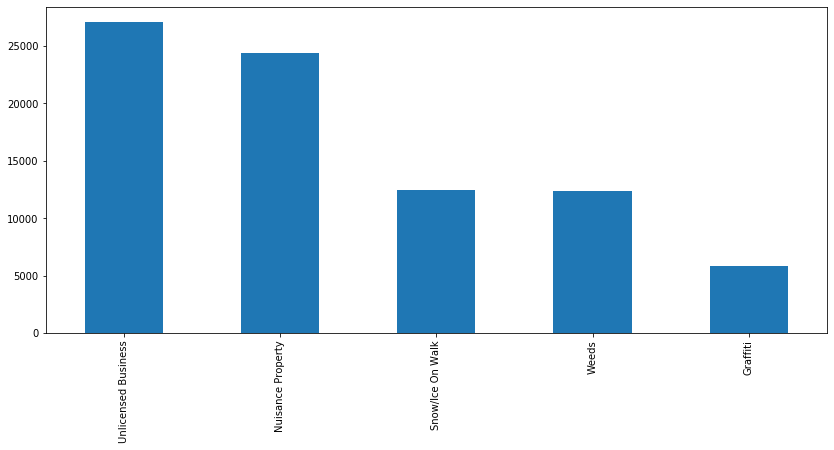

In [20]:
# this histogram shows the total number of each type of complaint made throughout the whole period
df['complaint'].value_counts().plot(kind='bar', figsize=(14,6))

In [21]:
# find percentage of each complaint out of the total number of complaints in our data set
(df.complaint.value_counts()/df.complaint.value_counts().sum())*100

Unlicensed Business    32.905510
Nuisance Property      29.691359
Snow/Ice On Walk       15.205781
Weeds                  15.068310
Graffiti                7.129040
Name: complaint, dtype: float64

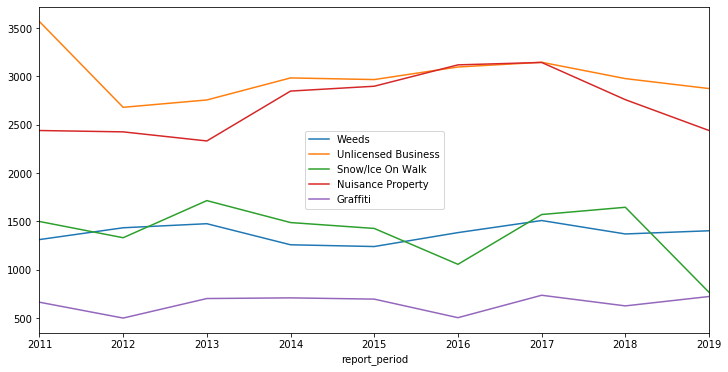

In [112]:
# find the frequency of each infraction by year to see if there are any signigicant differences over time
df.groupby(df.report_period.dt.year)['complaint'].apply(lambda x: x[x == 'Weeds'].count()).plot(figsize=(12,6), legend=True, label='Weeds')
df.groupby(df.report_period.dt.year)['complaint'].apply(lambda x: x[x == 'Unlicensed Business'].count()).plot(legend=True, label='Unlicensed Business')
df.groupby(df.report_period.dt.year)['complaint'].apply(lambda x: x[x == 'Snow/Ice On Walk'].count()).plot(legend=True, label='Snow/Ice On Walk')
df.groupby(df.report_period.dt.year)['complaint'].apply(lambda x: x[x == 'Nuisance Property'].count()).plot(legend=True, label='Nuisance Property')
df.groupby(df.report_period.dt.year)['complaint'].apply(lambda x: x[x == 'Graffiti'].count()).plot(legend=True, label='Graffiti')

<h3>Concolusions for questions number 1 & 2</h3>

- Unlicensed Business has always been the most frequent complaint, while Graffiti was the lowest

- There have been spikes in Nuisance Property complaints at times, specially in 2017 where it always as frequent as Unlicensed Business complaints

- There has been a sharp decrease in the number of Snow/Ice On Walk complaints in the past year

# ---
<h3>3- do certain areas experience more infractions consistently or not?</h3>
<h3>4- obtain a visual representation of infractions locations over time</h3>

In [257]:
area_freq = df.groupby('neighbourhood').count()

In [263]:
# find the areas with the highest recorded number of complaints received
area_freq.sort_values(by='count', ascending=False).head(10)

,report_period,complaint,initiated_by,count,latitude,longitude
neighbourhood,,,,,,
Strathcona,691,691,691,691,691,691
Alberta Avenue,681,681,681,681,681,681
McCauley,679,679,679,679,679,679
Downtown,663,663,663,663,663,663
Oliver,660,660,660,660,660,660
Central McDougall,616,616,616,616,616,616
Queen Mary Park,610,610,610,610,610,610
Ritchie,606,606,606,606,606,606
Westmount,604,604,604,604,604,604


In [139]:
# round the decimals to 2 for the purpose of plotting locations
df = df.round(decimals=2)
import numpy as np

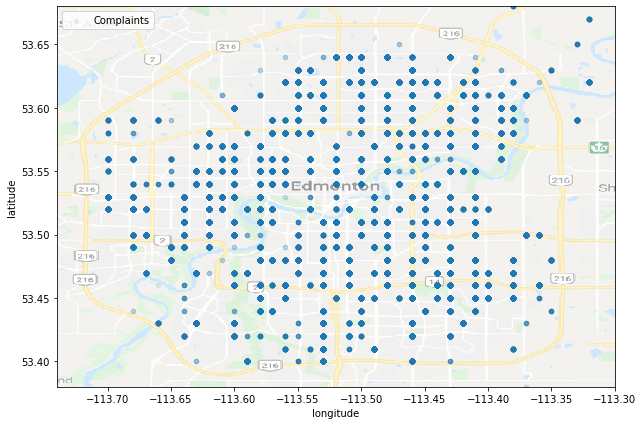

In [243]:
# show a rough representation of the complaints frequency on Edmonton map over the 8 years for which data is available
import matplotlib.image as mpimg
edmonton_image = mpimg.imread('edmonton.jpg')
ax = df.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,10), label="Complaints",colorbar=False, alpha=0.1,)
plt.imshow(edmonton_image, extent=[-113.74, -113.30, 53.38, 53.68], alpha=0.5)

<h3>Conclusions for questions number 3 & 4</h3>

- The number of complaints seems to be equally distrebuted among the different areas of Edmonton with no significant difference between the different areas

- The areas with the higest number of complaints lodged as seen above are Strathcona, Alberta Avenue, & McCauley

# ---
<h3>5- are more infractions reported by citizens or officers? and does it differ by location?</h3>

In [287]:
# find number of complaints raised by citizens as opposed to by-law officers
df.groupby('initiated_by').complaint.count()

initiated_by
By-law Officer    24287
Citizen           57912
Name: complaint, dtype: int64

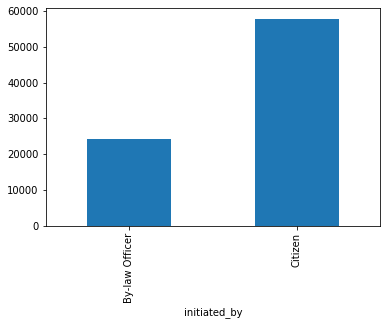

In [283]:
# we can use a simple bar chart for this measurement as there are only 2 possible values
df.groupby('initiated_by').complaint.count().plot(kind='bar')

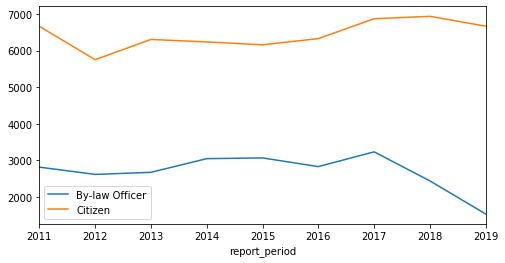

In [291]:
# visualization of the number of complaints raised by citizens and by-law officers over time from 2011 to 2019
df.groupby(df.report_period.dt.year)['initiated_by'].apply(lambda x: x[x == 'By-law Officer'].count()).plot(figsize=(8,4), legend=True, label='By-law Officer')
df.groupby(df.report_period.dt.year)['initiated_by'].apply(lambda x: x[x == 'Citizen'].count()).plot(legend=True, label='Citizen')

<h3>Conclusions for question number 5</h3>

- It has been consistent over time that citizens report more than double the number of complaints recorded by by-law officers, which is a normal occurance in this type of statistic

# Limitations
<h3> It is important for us to recognize that there are limitations to this data set:</h3>

- There aren't many indications of independent variables that we can use to predict the number of complaints increasing or decreasing in the future
- There isn't alot of data that we can use to affect the outcome in terms of lowering the number of complaints or how to handle them

# Closing

Even though this data set and analysis were merely observational, I felt it is important to study the types and frequencies of the by-law infractions in the city I live in as it provides us with a picture of the infractions that are more likely to occur and the geographical distrebution of those infractions, and it was fun =)

If you made it this far, thank you for reviewing my humble new project and I hope it added some value or knowledge to you.

Thank you.